# Module 4: Feature Detection -  Binary Image Analysis 
****

In computer vision, a feature is a part of an image that has some distinguishable characteristics that can be used to identify it or distinguish it from other features. These characteristics can include things like edges, corners, blobs, or other patterns in the image.

Feature detection algorithms are designed to identify and locate these features in an image. The most common types of features used in computer vision are corners and edges, as they are typically easy to detect and provide a lot of useful information about the image.

The process of feature detection involves analyzing the image to identify areas where features are likely to be found. This is usually done by searching for areas of high contrast or regions where there are abrupt changes in color or texture.

Once potential feature points are identified, feature detection algorithms will typically compute a descriptor for each feature. The descriptor is a mathematical representation of the feature that captures its key characteristics. This descriptor is then used to match features between images, or to identify similar features in different images.

### Jigsaw Example

Most of you will have played the jigsaw puzzle games. You get a lot of small pieces of an image, where you need to assemble them correctly to form a big real image. The question is, how you do it? What about the projecting the same theory to a computer program so that computer can play jigsaw puzzles? If the computer can play jigsaw puzzles, why can't we give a lot of real-life images of a good natural scenery to computer and tell it to stitch all those images to a big single image? If the computer can stitch several natural images to one, what about giving a lot of pictures of a building or any structure and tell computer to create a 3D model out of it?

Well, the questions and imaginations continue. But it all depends on the most basic question: How do you play jigsaw puzzles? How do you arrange lots of scrambled image pieces into a big single image? How can you stitch a lot of natural images to a single image?

The answer is, we are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared. If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what they are. If someone asks you to point out one good feature which can be compared across several images, you can point out one. That is why even small children can simply play these games. We search for these features in an image, find them, look for the same features in other images and align them. That's it. (In jigsaw puzzle, we look more into continuity of different images). All these abilities are present in us inherently.

So our one basic question expands to more in number, but becomes more specific. What are these features?

### Binary Image Analysis

Finding corners is important in feature detection because corners are distinctive and stable features in an image that can be used to identify and track objects. Corners are points in an image where the intensity of the image changes rapidly in all directions. These corners can be used as landmarks to detect and track objects even when the object is undergoing changes in scale, rotation, or perspective.

Corners are also useful because they are invariant to translation, which means that if an object is moved, the corners will remain in the same position. This property makes corners useful for matching features across multiple images.

Furthermore, corners provide information about the local structure of an image, which can be used to extract useful features that can be used for further analysis.

<img src="Graphics/search_1.png">

<img src="Graphics/search_2.png">

In [6]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import image
img = cv2.imread('Graphics/image2.png', 0)

print(img.size)

print(img.shape)

print(img.dtype)

print(img)

225
(15, 15)
uint8
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255   0   0   0 255 255 255 255 255   0   0   0 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]]


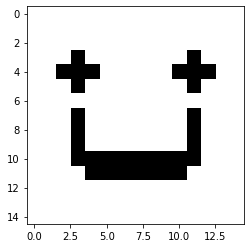

In [7]:
plt.imshow(img, cmap='gray')

In [8]:
# Convert to 0 and 1
img = np.uint8(img/255)

In [9]:
print(img)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


## Results

+ 0 represents absence of material indicated by light passing.
+ 1 represents material which light has not passed. 


In [12]:
# Let's make arrays out of all the external corners.  Separate Variables to illustrate.   Exercise:  Make them 3D arrays to start.
exCorner1 = np.array([[[1,1],[1,0]]])
exCorner2 = np.array([[[1,1],[0,1]]])
exCorner3 = np.array([[[1,0],[1,1]]])
exCorner4 = np.array([[[0,1],[1,1]]])

# Combine all the external corners into one array.
exCorner = np.concatenate((exCorner1, exCorner2, exCorner3, exCorner4), axis=0)

# Let's make arrays out of all the internal corners.
inCorner1 = np.array([[[0,0],[0,1]]])
inCorner2 = np.array([[[0,0],[1,0]]])
inCorner3 = np.array([[[0,1],[0,0]]])
inCorner4 = np.array([[[1,0],[0,0]]])

# Combine all the internal corners into one array.
inCorner = np.concatenate((inCorner1, inCorner2, inCorner3, inCorner4))


Number of holes: 3


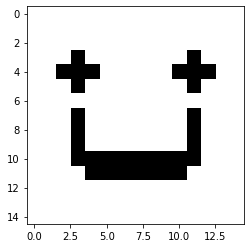

In [13]:
# Write the function to search the image for the number of holes. 

def count_holes(img):

    h = img.shape[0]
    w = img.shape[1]

    # counting variables
    e = 0
    i = 0

    for y in range(0,h-1):
        for x in range(0,w-1):

            curFrame = np.array([[img[y,x],img[y,x+1]], [img[y+1,x],img[y+1,x+1]]])

            for n in range(0,exCorner.shape[0]):

                if(np.array_equal(exCorner[n], curFrame)):
                    e += 1

                if(np.array_equal(inCorner[n], curFrame)):
                    i += 1

    return(np.uint8((e-i)/4))

number_of_holes = count_holes(img)
print('Number of holes:', number_of_holes)
plt.imshow(img, cmap='gray')